In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [72]:
hdf = pd.read_csv('C:/Users/sidna/Downloads/NYPD_Shooting_Incident_Data__Historic__20240111.csv')
ydf = pd.read_csv('C:/Users/sidna/Downloads/NYPD_Shooting_Incident_Data__Year_To_Date__20240111.csv')

In [73]:
hdf.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [74]:
hdf.shape

(27312, 21)

In [75]:
ydf.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,265303128,03/18/2023,03:45:00,QUEENS,OUTSIDE,102,0,OTHER,HOSPITAL,N,...,M,BLACK,25-44,M,BLACK,1030953,194101,NaN,NaN,NaN
1,264075661,02/22/2023,16:55:00,BRONX,OUTSIDE,44,0,STREET,(null),N,...,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1004343,243407,40.834751,-73.927388,POINT (-73.927388 40.834751)
2,270760379,07/03/2023,21:25:00,BROOKLYN,OUTSIDE,75,0,STREET,(null),N,...,M,BLACK,25-44,M,BLACK,1008769,177614,40.654153,-73.911632,POINT (-73.911632 40.654153)
3,265124475,03/14/2023,09:49:00,MANHATTAN,OUTSIDE,20,0,STREET,COMMERCIAL BLDG,N,...,M,BLACK,<18,M,BLACK,988755,221899,40.775738,-73.983734,POINT (-73.983734 40.775738)
4,266761946,04/15/2023,15:46:00,MANHATTAN,INSIDE,32,0,DWELLING,MULTI DWELL - APT BUILD,N,...,(null),(null),25-44,M,WHITE HISPANIC,1000980,239318,40.823533,-73.939551,POINT (-73.939551 40.823533)


In [76]:
ydf.rename(columns = {'New Georeferenced Column':'Lon_Lat'}, inplace = True)

In [77]:
ydf.shape

(991, 21)

In [78]:
df = pd.concat([hdf, ydf])

In [79]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [80]:
df.shape

(28303, 21)

In [81]:
#Handling missing data values
df['LOCATION_DESC'].fillna(value = 'NONE', inplace = True)
df['LOCATION_DESC'].replace('(null)', 'NONE', inplace=True)
df['PERP_AGE_GROUP'].fillna(value = 'UNKNOWN', inplace = True)
df['PERP_AGE_GROUP'].replace('(null)', 'UNKNOWN', inplace=True)
df['PERP_SEX'].fillna(value = 'U', inplace = True)
df['PERP_SEX'].replace('(null)', 'U', inplace=True)
df['PERP_RACE'].fillna(value = 'UNKNOWN', inplace = True)
df['PERP_RACE'].replace('(null)', 'UNKNOWN', inplace=True)
df['LOC_OF_OCCUR_DESC'].fillna(value = 'UNKNOWN', inplace = True)
df['LOC_CLASSFCTN_DESC'].fillna(value = 'UNKNOWN', inplace = True)

In [82]:
df['PERP_AGE_GROUP'].value_counts()

UNKNOWN    13507
18-24       6408
25-44       5972
<18         1668
45-64        682
65+           62
1028           1
1020           1
224            1
940            1
Name: PERP_AGE_GROUP, dtype: int64

In [83]:
df.drop(df[df['PERP_AGE_GROUP'] == '1028'].index, inplace = True)
df.drop(df[df['PERP_AGE_GROUP'] == '1020'].index, inplace = True)
df.drop(df[df['PERP_AGE_GROUP'] == '940'].index, inplace = True)
df.drop(df[df['PERP_AGE_GROUP'] == '224'].index, inplace = True)

In [84]:
df['VIC_AGE_GROUP'].value_counts()

25-44      12815
18-24      10328
<18         2930
45-64       1959
65+          201
UNKNOWN       63
1022           1
Name: VIC_AGE_GROUP, dtype: int64

In [85]:
df.drop(df[df['VIC_AGE_GROUP'] == '1022'].index, inplace = True)

In [86]:
df['LOC_OF_OCCUR_DESC'].value_counts()

UNKNOWN    25592
OUTSIDE     2311
INSIDE       393
Name: LOC_OF_OCCUR_DESC, dtype: int64

In [87]:
#Extracting year, month and days from the date of occurence
df['year'] = pd.DatetimeIndex(df['OCCUR_DATE']).year
df['month'] = pd.DatetimeIndex(df['OCCUR_DATE']).month
df['day'] = pd.DatetimeIndex(df['OCCUR_DATE']).day

#Extracting day of week from the date
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])

df['day_of_week'] = df['OCCUR_DATE'].dt.day_name()

#Extracting hours and minutes of the incident from the occurence time
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'])
df['hour'] = df['OCCUR_TIME'].dt.strftime('%H')
df['minutes'] = df['OCCUR_TIME'].dt.strftime('%M')

In [88]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year,month,day,day_of_week,hour,minutes
0,228798151,2021-05-27,2024-01-11 21:30:00,QUEENS,UNKNOWN,105,0.0,UNKNOWN,NONE,False,...,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021,5,27,Thursday,21,30
1,137471050,2014-06-27,2024-01-11 17:40:00,BRONX,UNKNOWN,40,0.0,UNKNOWN,NONE,False,...,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014,6,27,Friday,17,40
2,147998800,2015-11-21,2024-01-11 03:56:00,QUEENS,UNKNOWN,108,0.0,UNKNOWN,NONE,True,...,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015,11,21,Saturday,03,56
3,146837977,2015-10-09,2024-01-11 18:30:00,BRONX,UNKNOWN,44,0.0,UNKNOWN,NONE,False,...,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015,10,9,Friday,18,30
4,58921844,2009-02-19,2024-01-11 22:58:00,BRONX,UNKNOWN,47,0.0,UNKNOWN,NONE,True,...,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009,2,19,Thursday,22,58


In [89]:
columns = ['OCCUR_DATE', 'OCCUR_TIME']
df.drop(columns, axis =1, inplace = True)

In [90]:
df.head()

,INCIDENT_KEY,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year,month,day,day_of_week,hour,minutes
0,228798151,QUEENS,UNKNOWN,105,0.0,UNKNOWN,NONE,False,UNKNOWN,U,...,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021,5,27,Thursday,21,30
1,137471050,BRONX,UNKNOWN,40,0.0,UNKNOWN,NONE,False,UNKNOWN,U,...,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014,6,27,Friday,17,40
2,147998800,QUEENS,UNKNOWN,108,0.0,UNKNOWN,NONE,True,UNKNOWN,U,...,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015,11,21,Saturday,03,56
3,146837977,BRONX,UNKNOWN,44,0.0,UNKNOWN,NONE,False,UNKNOWN,U,...,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015,10,9,Friday,18,30
4,58921844,BRONX,UNKNOWN,47,0.0,UNKNOWN,NONE,True,25-44,M,...,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009,2,19,Thursday,22,58


We need to create a subset of the dataset since there are duplicates in the incident_key column. As mentioned in the footnotes, A shooting incident can have multiple victims involved and as a result duplicate INCIDENT_KEY’s are produced and each incident key represents a victim but duplicate keys represent a single incident. So we will create a dataframe where we remove the duplicate incident keys and just keep one record. We will only use this dataset when we have to index the data on incident_key column(example: counting number of incidents based on hour, day, month, year etc.). Using this for analyzing perpetrator or victim data would be not be correct, since the duplicates deleted would have contained the information of multiple victims from one incident and that data is lost in the new data subset.

In [91]:
dfi = df.drop_duplicates(subset='INCIDENT_KEY', keep="last")

In [92]:
dfi.head()

,INCIDENT_KEY,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year,month,day,day_of_week,hour,minutes
1,137471050,BRONX,UNKNOWN,40,0.0,UNKNOWN,NONE,False,UNKNOWN,U,...,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014,6,27,Friday,17,40
2,147998800,QUEENS,UNKNOWN,108,0.0,UNKNOWN,NONE,True,UNKNOWN,U,...,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015,11,21,Saturday,03,56
3,146837977,BRONX,UNKNOWN,44,0.0,UNKNOWN,NONE,False,UNKNOWN,U,...,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015,10,9,Friday,18,30
4,58921844,BRONX,UNKNOWN,47,0.0,UNKNOWN,NONE,True,25-44,M,...,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009,2,19,Thursday,22,58
5,219559682,BROOKLYN,UNKNOWN,81,0.0,UNKNOWN,NONE,True,UNKNOWN,U,...,186461.703125,40.678457,-73.927952,POINT (-73.92795224099996 40.678456718000064),2020,10,21,Wednesday,21,36


In [93]:
dfi.shape

(22174, 25)

Let's do some very high level data analysis by counting the number of incidents in each boro and precinct. 

<AxesSubplot:xlabel='BORO', ylabel='count'>

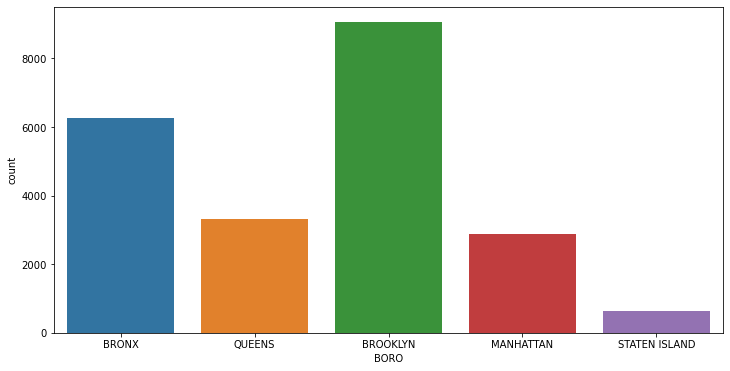

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'BORO', data = dfi)

<AxesSubplot:xlabel='PRECINCT', ylabel='count'>

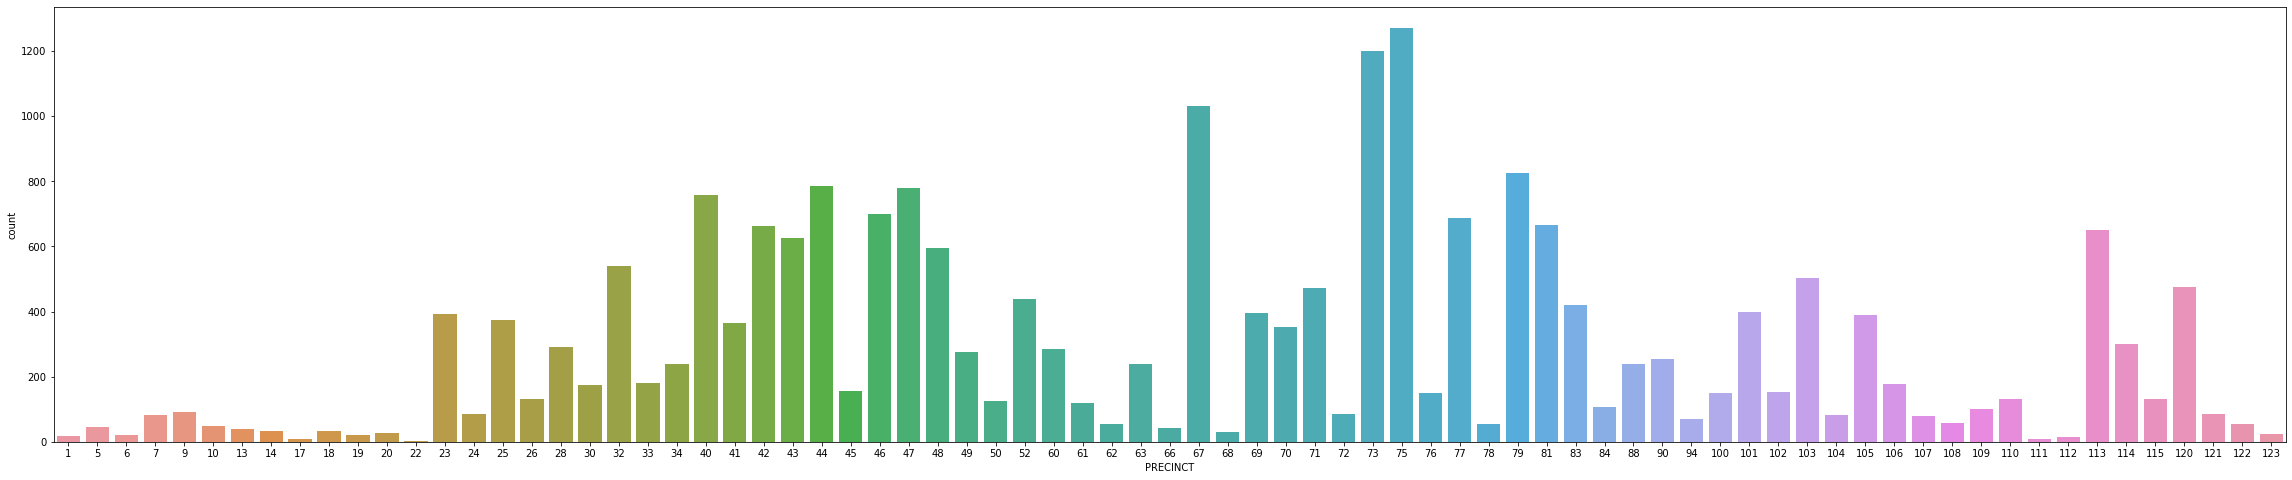

In [97]:
plt.figure(figsize=(40,8))
sns.countplot(x = 'PRECINCT', data = dfi)

Let's plot subplots of year, month and day of the week to check the trends in the data.

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

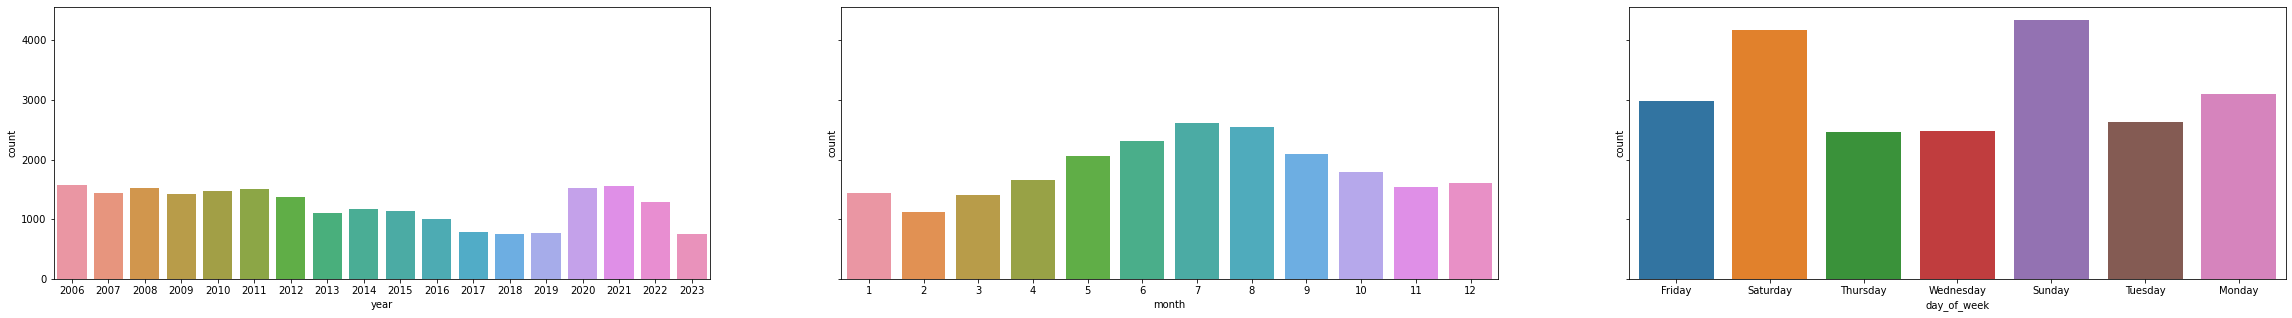

In [99]:
fig, axes = plt.subplots(1, 3, figsize = (40,5), sharey = True)
sns.countplot(x = 'year', data = dfi, ax = axes[0])
sns.countplot(x = 'month', data = dfi, ax = axes[1])
sns.countplot(x = 'day_of_week', data = dfi, ax = axes[2])

The y-o-y numbers have gone dowm from 2006 until 2019 but has risen in 2020, and it can be seen that most incidents occur in the summer(June, July, August) and on weekends (Saturday and Sunday).

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28296 entries, 0 to 990
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             28296 non-null  int64  
 1   BORO                     28296 non-null  object 
 2   LOC_OF_OCCUR_DESC        28296 non-null  object 
 3   PRECINCT                 28296 non-null  int64  
 4   JURISDICTION_CODE        28294 non-null  float64
 5   LOC_CLASSFCTN_DESC       28296 non-null  object 
 6   LOCATION_DESC            28296 non-null  object 
 7   STATISTICAL_MURDER_FLAG  28296 non-null  object 
 8   PERP_AGE_GROUP           28296 non-null  object 
 9   PERP_SEX                 28296 non-null  object 
 10  PERP_RACE                28296 non-null  object 
 11  VIC_AGE_GROUP            28296 non-null  object 
 12  VIC_SEX                  28296 non-null  object 
 13  VIC_RACE                 28296 non-null  object 
 14  X_COORD_CD              

In [101]:
df = df.astype({ "hour": int, "minutes": int})
dfi = dfi.astype({ "hour": int, "minutes": int})

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

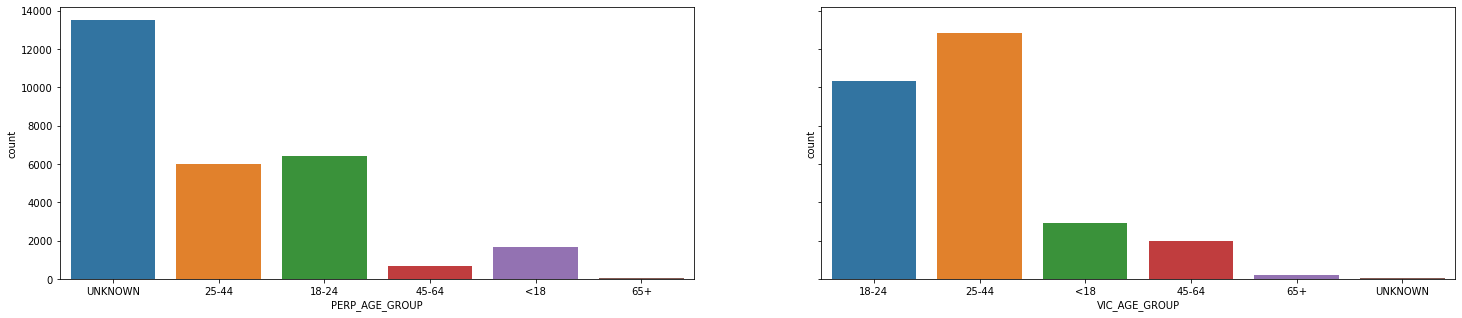

In [102]:
fig, axes = plt.subplots(1, 2, figsize = (25,5), sharey = True)
sns.countplot(x = 'PERP_AGE_GROUP', data = df, ax = axes[0])
sns.countplot(x = 'VIC_AGE_GROUP', data = df, ax = axes[1])

There are a lot of unknowns here which is understandable since it can be unclear as to who was the perpetrator. The unknown count is very less for victims, since the cops can ID the victim and get the age once they have identified them.

In [103]:
#Using Chi Squared test of independence to test the correlation between features

from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

In [104]:
chisq_of_df_cols(df, 'PERP_AGE_GROUP','VIC_AGE_GROUP')

(2906.7855604803267,
 0.0,
 25,
 array([[2.33818094e+03, 2.17977156e+03, 2.48929036e+02, 2.26299124e+01,
         6.08817642e+02, 4.92967091e+03],
        [2.90121890e+03, 2.70466426e+03, 3.08871572e+02, 2.80792338e+01,
         7.55421968e+02, 6.11674406e+03],
        [4.43502757e+02, 4.13455895e+02, 4.72164970e+01, 4.29240882e+00,
         1.15479644e+02, 9.35052799e+02],
        [4.55048770e+01, 4.24219678e+01, 4.84457167e+00, 4.40415606e-01,
         1.18486005e+01, 9.59395674e+01],
        [6.63329799e+02, 6.18389878e+02, 7.06198756e+01, 6.41998869e+00,
         1.72718405e+02, 1.39852205e+03],
        [1.42627226e+01, 1.32964377e+01, 1.51844784e+00, 1.38040712e-01,
         3.71374046e+00, 3.00706107e+01]]))

In [105]:
chisq_of_df_cols(df, 'PERP_SEX','VIC_SEX')

(109.53735315278276,
 9.133901424592773e-23,
 4,
 array([[4.25165394e+01, 1.54563528e+03, 1.13984818e+03],
        [3.98312023e+02, 1.44801323e+04, 1.06785557e+04],
        [1.71437659e-01, 6.23240034e+00, 4.59616200e+00]]))

Since the p-value of perpetrator's age and victim's age is 0, we can infer that they are correlated. So let's plot a graph and see what we can find out from the data.

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

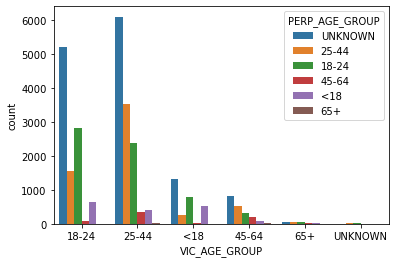

In [106]:
#Counting the number of incidents by Perpetrator age group on each on victim age group
sns.countplot(x = 'VIC_AGE_GROUP',hue = 'PERP_AGE_GROUP', data = df)

It can be observed that the age of the perpetrator and victim is usually in the same range. For example, the victim's age group
of 25-44 years, the maximum shooting incidents where done by the perpetrators in the age group of 25-44. Same is the case with
the age groups of 18-24 (ignoring the unknown age group)

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

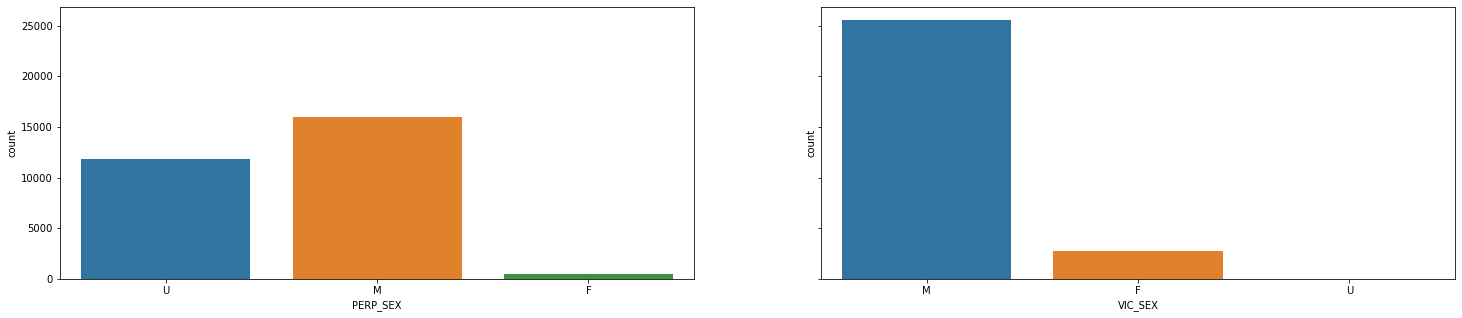

In [107]:
#Let's count the number of incidents by the sex of the perpetrator and victim
fig, axes = plt.subplots(1, 2, figsize = (25,5), sharey = True)
sns.countplot(x = 'PERP_SEX', data = df, ax = axes[0])
sns.countplot(x = 'VIC_SEX', data = df, ax = axes[1])

Most of the perpetrators involved in these shooting incidents have been males(again ignoring the unknown) and majority of the victims have been males as well. One can also see that the female count in prepetrator is much less than in victims. 

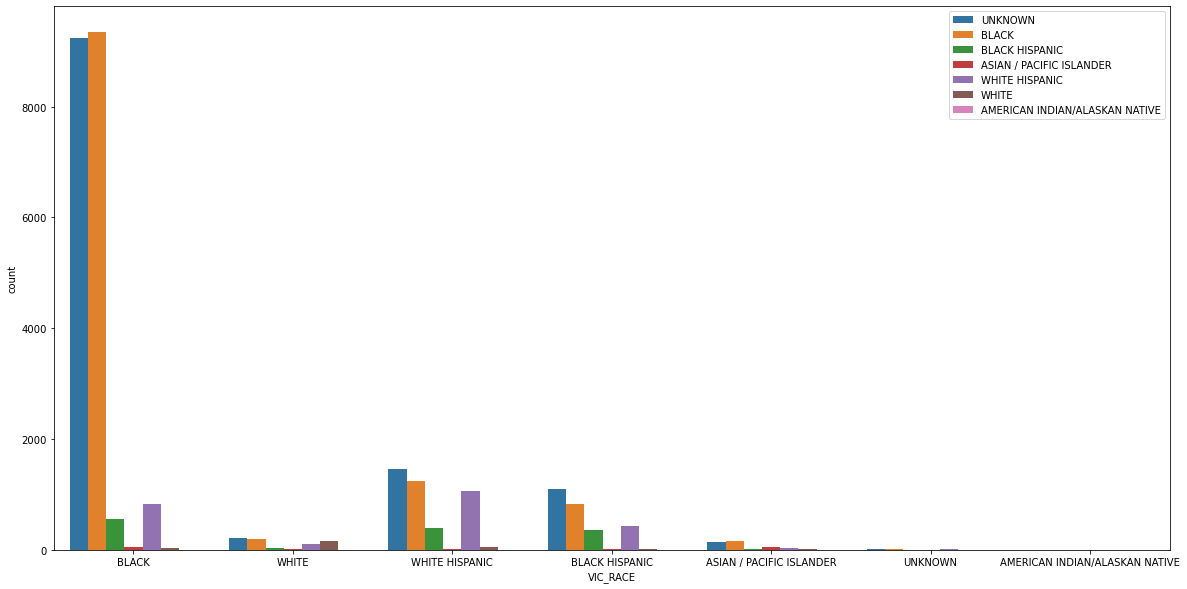

In [108]:
#Plotting victim race against perp race to see which race is involved more
plt.figure(figsize=(20,10))
sns.countplot(x = 'VIC_RACE',hue = 'PERP_RACE', data = df)
plt.legend(loc = 'upper right')

It can be seen that the race of people involved in these incidents is mostly Black, followed by Hispanics(both victims and
perpetrators)

In [109]:
#Data preparation for visualizing number of incidents based on the hour and day of the week
dft = dfi.groupby(by = [dfi['hour'],dfi['day_of_week']])['INCIDENT_KEY'].count().rename('Counts').to_frame()

<AxesSubplot:xlabel='hour', ylabel='Counts'>

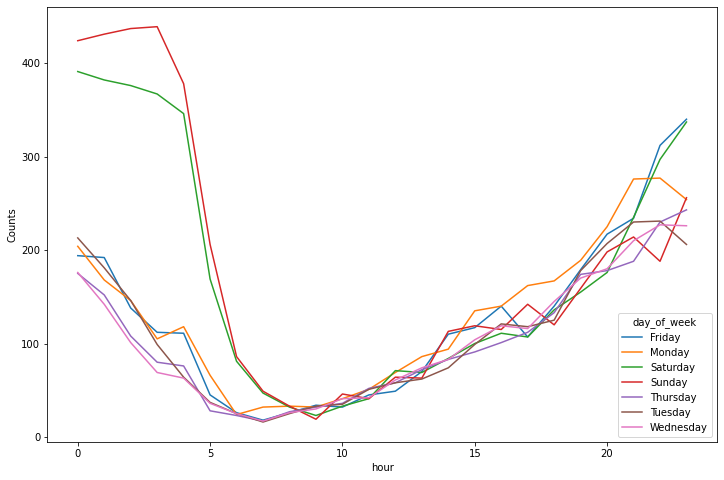

In [110]:
#plotting the data
plt.figure(figsize = (12,8))
sns.lineplot( x = 'hour', y = 'Counts' , data = dft, hue = 'day_of_week')

Most number of incidents happen on the weekends looking at the graph above. It is almost twice the number that happen on weekdays.

Observations:
1. There was a downward trend of the number of shootings each year until 2019 and they rose again in 2020
2. The most number of shooting incidents happen in the summer usually in June, July, August and September months.
3. Most of them happen during the hours from 2200 to 0400 on Friday leading into Saturday and on Saturday leading into Sunday. So it is safe to say that most of them happen on weekends.
4. Black population is the most impacted by shootings, both as perpetrators and victims.
5. More than 90% of the people involved in shooting incidents are males
6. Most affected people are in the age group of 18 to 44 years. Perpetrators are more likely to shoot people in their own age group.

Recommendations:

1. Additional legislature could be passed to make gun control more effective, stricter screening measures would certainly help.
2. Additional security resources and measurements to tackle and prevent such incidents especially in the boroughs with high        incident rate (Bronx and Brooklyn) and between 2200 to 0400 hours in places such as clubs and restaurants that are open late
   in the night.
3. Police department can hire more personnels to take night shifts on weekends during the months of May to August. They can
   start by focussing on precinct 73 and 75 where the incident rates are highest.
4. Even though causation cannot be outrightly implied, underlying issues like education, low household income, ratio of minimum    wage to cost of living, increase in unemployment rates would need to be addressed.
5. Based on the age group of the perpetrators and the predominant gender and race, empowerment programs such as scholarship,      mentorship, job creation, higher education awareness, workshops can be targetted towards this specific group.